# 데이터 시각화

### # 판다스 기본 설치되어 있는 시각화 함수
  * line = 선
  * kde = 커널 밀도 그래프
  * bar = 수직 막대 그래프
  * area = 면적 그래프
  * barh = 수평 막대 그래프
  * pie = 파이 그래프
  * hist = 히스토그램
    - 변수가 하나인 데이터의 빈도수
  * scatter = 산점도 그래프
  * box = 박스 플롯
  * hexbin = 고밀도 산점도 그래프

### # matplotlib 은 한글 폰트를 지원하지 않는다
  * 코드를 미리 적용해야 깨지지 않는다

In [1]:
# 윈도우
plt.rc('font', family = 'Malgun Gothic')

# Mac
plt.rc('font', family = 'AppleGothic')

NameError: name 'plt' is not defined

### # 시본(seaborn) 라이브러리에 있는 내장 데이터셋 중에 anscombe 데이터셋 읽어오기

In [141]:
import seaborn as sns

ans = sns.load_dataset("anscombe")

In [70]:
ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [8]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [9]:
ans.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


### # 문제
  * dataset 컬럼 값을 기준으로 그룹화
  * 변수명은 ans_group

In [20]:
ans_group = ans.groupby(["dataset"])

ans_group.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


In [22]:
ans_group.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### # 시각화 라이브러리(matplotlib.pyplot) 불러들이기

In [24]:
import matplotlib.pyplot as plt

### # 문제
  * ans 데이터프레임을 사용
  * dataset 데이터 값 중에 1인 값만 조회
  * 변수는 filter_row_chk 사용

In [43]:
filter_row_chk = (ans["dataset"] == "I")

filter_row_chk.head()

0    True
1    True
2    True
3    True
4    True
Name: dataset, dtype: bool

### # 문제
  * 위에서 필터링한 결과를 기준으로 데이터 조회
  * 변수는 data1

In [46]:
data1 = ans[filter_row_chk]

data1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### # 선그래프

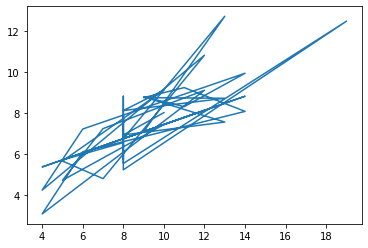

In [47]:
plt.plot(data1["x"], data1["y"])

### # 산점도로 표현

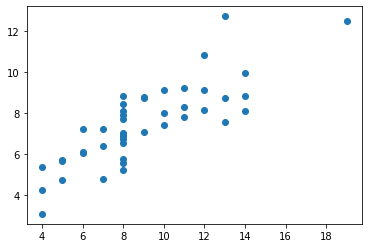

In [49]:
plt.plot(data1["x"], data1["y"], "o")

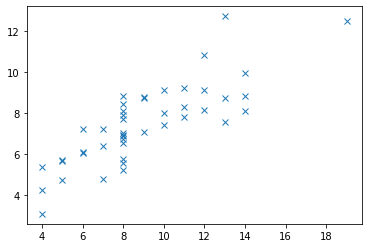

In [58]:
plt.plot(data1["x"], data1["y"], "x")

### # 문제
  * dataset 안에 있는 II, III, IV에 대해서도 필터링 후
  * data2, data3, data4 변에 각각 넣기

In [71]:
data2 = ans[ans["dataset"] == "II"]

data3 = ans[ans["dataset"] == "III"]

data4 = ans[ans["dataset"] == "IV"]

In [72]:
print(data2)
print(data3)
print(data4 )

   dataset     x     y
11      II  10.0  9.14
12      II   8.0  8.14
13      II  13.0  8.74
14      II   9.0  8.77
15      II  11.0  9.26
16      II  14.0  8.10
17      II   6.0  6.13
18      II   4.0  3.10
19      II  12.0  9.13
20      II   7.0  7.26
21      II   5.0  4.74
   dataset     x      y
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
   dataset     x      y
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


### # 하나의 그래프에 4개의 sub 그래프 그리기
  1. 그래프 객체 가지고 오기

In [73]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

  2. 4개의 작은 그래프 만들기

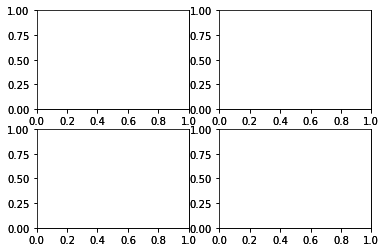

In [75]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

fig

### # 각각의 그래프에 데이터 넣어주기

  * 그래프 제목 만들기

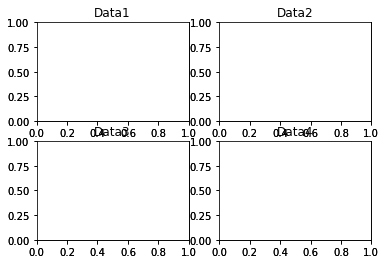

In [78]:
ax1.set_title("Data1")
ax2.set_title("Data2")
ax3.set_title("Data3")
ax4.set_title("Data4")

fig

  * 그래프 간격 조절

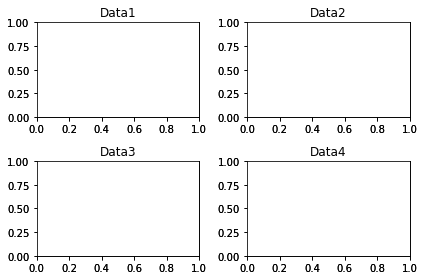

In [79]:
fig.tight_layout()

fig

### # 기본 시각화 그리기

In [116]:
import matplotlib as mpl
import matplotlib.pylab as plt

In [90]:
# 리스트 1,2,3,4 를 만들어서 l(소문자 엘) 변수에 넣기

l = [1,2,3,4]

#### cf) plot에는 리스트 형태를 넣을 수 있다.

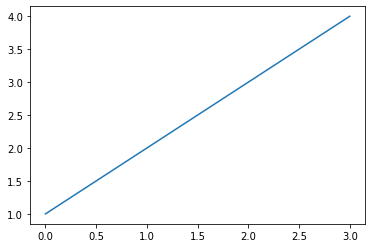

In [91]:
plt.plot(l)

### # 시각화 옵션들

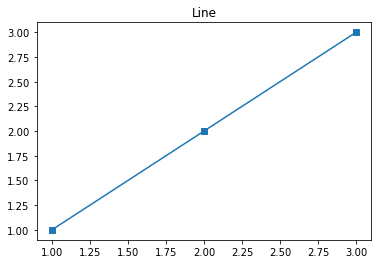

In [99]:
plt.title("Line")

plt.plot([1,2,3], [1,2,3], marker="s")

plt.show()

### # 범례 추가 및 출력
  * 그래프 관련 문장은 한 cell 안에서 다 써야한다.
    - 예) plt.legend(), plt.show()

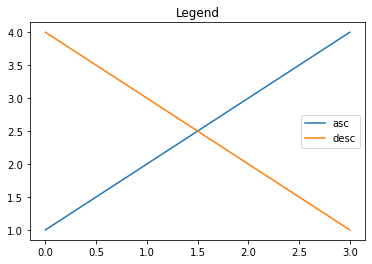

In [105]:
plt.title("Legend")
plt.plot([1,2,3,4], label="asc")
plt.plot([4,3,2,1], label="desc")

plt.legend() # 범례 표시
plt.show() # 그래프 출력

### # 선 색 지정
  * default는 파랑색

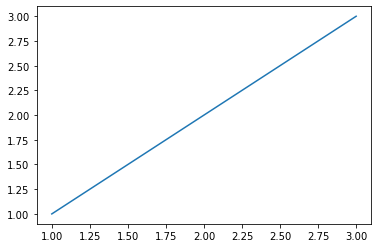

In [107]:
plt.plot([1,2,3], [1,2,3], color="red")

plt.show()

### # x, y축 이름 지정

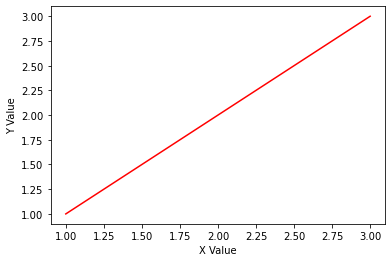

In [109]:
plt.plot([1,2,3], [1,2,3], color="red")

plt.xlabel("X Value")

plt.ylabel("Y Value")

plt.show()

### # 선 색상, 선 스타일 변경

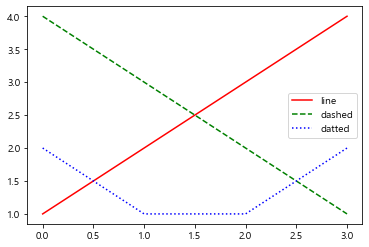

In [119]:
plt.plot([1,2,3,4], color="r", linestyle = "-", label = "line")

plt.plot([4,3,2,1], color="g", linestyle = "--", label = "dashed")

plt.plot([2,1,1,2], color="b", linestyle = ":", label = "datted")

# 범레 출연
plt.legend()
plt.show()

### # x,y축 범위 지정

  * c : 색상
  * lw : 선의 굵기
  * ls : 선의 스타일
  * marker : 표시할 형태
  * ms : 마커의 전체 크기
  * mec : 마커의 데두리 색상
  * mew : 마커의 테두리 사이즈
  * mfc : 마커 내부의 채우기 색상

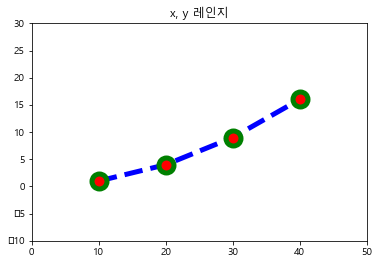

In [120]:
# 한글 폰트 안깨지게 하기
plt.rc('font', family = 'Malgun Gothic')

plt.title("x, y 레인지")

plt.plot([10,20,30,40],
         [1,4,9,16],
         c = "b", lw=5, ls="--", marker = "o", ms = 15,
         mec="g", mew = 5, mfc = "r")

# x축의 범위 지정
plt.xlim(0,50)

# y축의 범위 지정
plt.ylim(-10,30)

plt.show()

### # tips 데이터셋 불러드리기

In [122]:
tips = sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:>

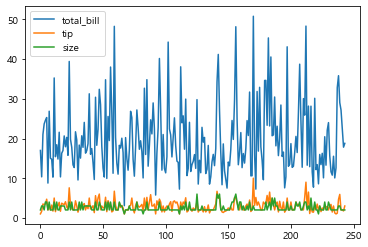

In [123]:
tips.plot()

### #  선그래프

<AxesSubplot:>

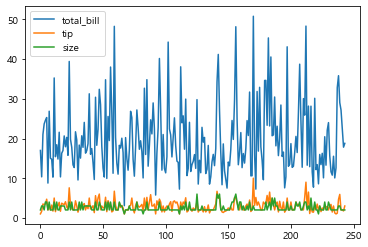

In [124]:
tips.plot(kind = "line")

### # 히스토그램 그래프

<AxesSubplot:ylabel='Frequency'>

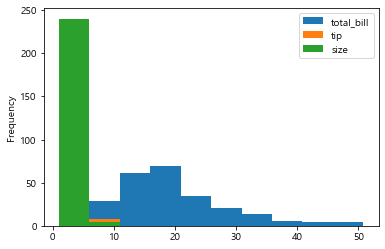

In [126]:
tips.plot(kind = "hist")

### # 박스플롯 그래프

<AxesSubplot:>

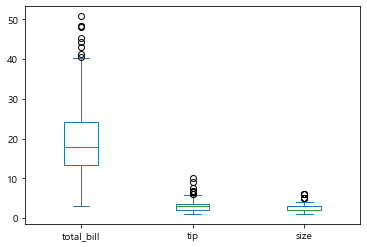

In [127]:
tips.plot(kind = "box")

### # 특정 컬럼 그래프

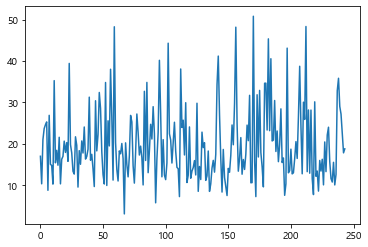

In [128]:
plt.plot(tips["total_bill"])

### # x,y 축을 특정 컬럼으로 지정하고 막대그래프 시각화

<BarContainer object of 244 artists>

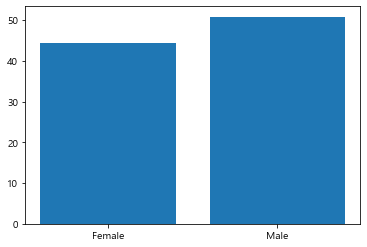

In [129]:
plt.bar(tips["sex"], tips["total_bill"])

### # 산점도 그래프

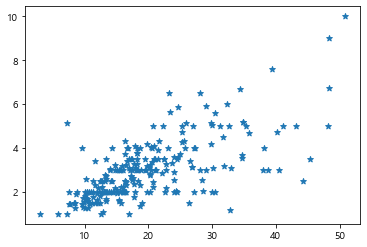

In [135]:
plt.scatter(tips["total_bill"], tips["tip"], marker = "*")

### # 히스토그램
  * 히스토그램은 하나의 컬럼에 대해서만 사용가능

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

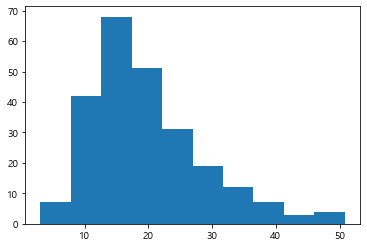

In [136]:
plt.hist(tips["total_bill"])

(array([76.,  0.,  0., 87.,  0.,  0., 62.,  0.,  0., 19.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

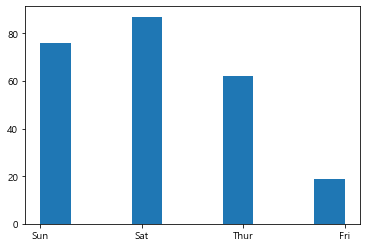

In [137]:
plt.hist(tips["day"])

### # 붓꽃, 타이타닉호, tips, 여객운송 데이터셋 불러드리기

In [146]:
iris = sns.load_dataset("iris")

titanic = sns.load_dataset("titanic")

tips = sns.load_dataset("tips")

flights = sns.load_dataset("flights")

In [147]:
print(iris)
print(titanic)
print(tips)
print(flights)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S  

### # sns.set_palette(" ") 색깔 종류
  * deep, muted, paste, bright, dar, colorblind

Text(0.5, 0, '요일')

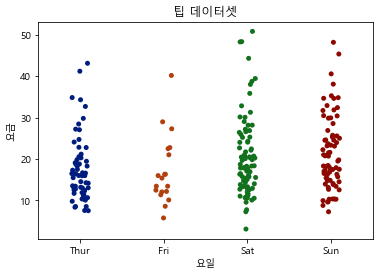

In [152]:
sns.set_palette("dark")

sns.stripplot(data=tips, x="day", y="total_bill")

plt.title("팁 데이터셋")

plt.ylabel("요금")

plt.xlabel("요일")

### # sns 막대그래프
  * 오차막대(error bar) : 오차 막대의 길이는 작을수록 좋다.

<AxesSubplot:xlabel='sex', ylabel='tip'>

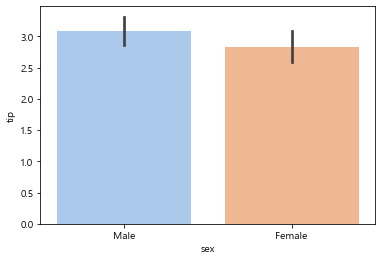

In [158]:
sns.set_palette("pastel")

sns.barplot(data = tips, x="sex", y="tip")


# 오차막대를 지우는 방법
# sns.barplot(data = tips, x="sex", y="tip", estimator = len)

### # barplot에서 x,y축 기본에 분류를 한 개 더 추가하고 싶을 때
  * 1개까지만 추가 가능

<AxesSubplot:xlabel='sex', ylabel='tip'>

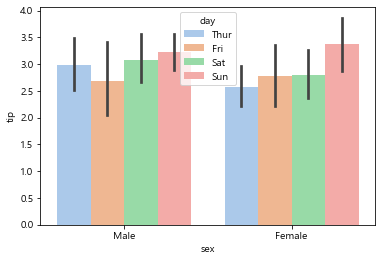

In [159]:
sns.barplot(data = tips, x="sex", y="tip", hue="day")

### # count 그래프

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


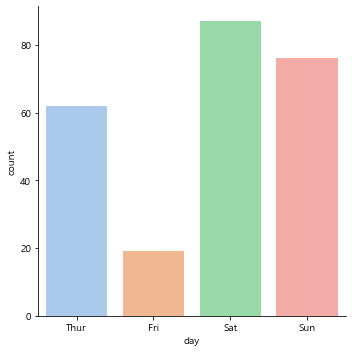

In [162]:
sns.catplot("day",  kind = "count", data = tips)

<AxesSubplot:xlabel='sex', ylabel='tip'>

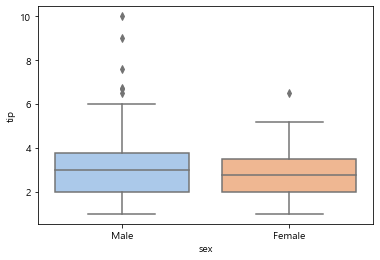

In [163]:
sns.boxplot(x="sex", y="tip", data=tips)

### # 수직, 수평 조정

<AxesSubplot:>

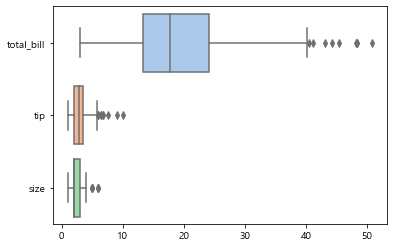

In [166]:
sns.boxplot(data=tips, orient="h")

# sns.boxplot(data=tips, orient="v")

### # 러그(rug)플롯
  * 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

<AxesSubplot:xlabel='tip'>

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


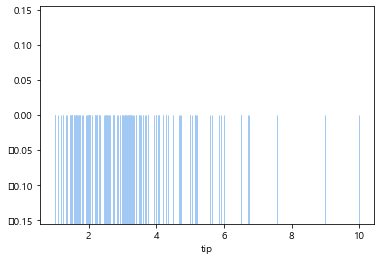

In [167]:
sns.rugplot(tips["tip"], height=0.5)

### # 커널밀도 그래프

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

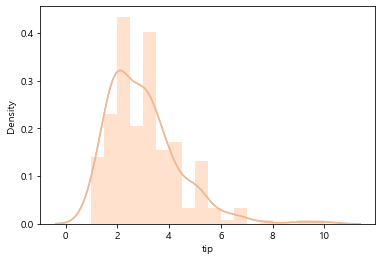

In [173]:
sns.kdeplot(tips["tip"])

sns.distplot(tips["tip"])